**Loading the dataset**

In [1]:
from google.colab import files
dataset = files.upload()

Saving telescope_data.csv to telescope_data.csv


**Calculating multivariate mean vector**

In [2]:
import pandas as pd
df = pd.read_csv('telescope_data.csv')
mean_vector = df.mean()
print(mean_vector)

fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


<ipython-input-2-1e8b8367f2ac>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_vector = df.mean()


**Computing the sample covariance matrix as inner products between the columns of the centered data matrix**

In [3]:
meanVector = df.mean()
centeredData = df - meanVector
covarienceMatrix = centeredData.cov()
print(covarienceMatrix)

              fAlpha        fAsym     fConc    fConc1        fDist  \
fAlpha    825.699936    10.170821  1.319799  0.710753  -479.369739   
fAsym      10.170821  3899.838668  0.329190  0.154446  -659.973549   
fConc       1.319799     0.329190  0.029483  0.017875    -4.615745   
fConc1      0.710753     0.154446  0.017875  0.011461    -2.523787   
fDist    -479.369739  -659.973549 -4.615745 -2.523787  6361.467591   
fLength   -42.699515  -338.521963 -4.795976 -2.754310  1088.506735   
fM3Long  -277.106455  -263.597250 -0.884361 -0.605827   633.900249   
fM3Trans  -33.519699    15.496390 -0.393915 -0.209961   165.463602   
fSize      -2.846388     0.460739 -0.067494 -0.038788    17.400684   
fWidth     34.672026   254.802711 -2.230835 -1.292486   456.444068   

              fLength      fM3Long    fM3Trans      fSize      fWidth  
fAlpha     -42.699515  -277.106455  -33.519699  -2.846388   34.672026  
fAsym     -338.521963  -263.597250   15.496390   0.460739  254.802711  
fConc       -

<ipython-input-3-d5d7c0100700>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meanVector = df.mean()
<ipython-input-3-d5d7c0100700>:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covarienceMatrix = centeredData.cov()


**Computing the sample covariance matrix as outer product between the centered data points**

In [4]:
import numpy as np
covarienceMatrixOuterProduct = np.dot(centeredData.T, centeredData) / (centeredData.shape[0] - 1)
print(covarienceMatrixOuterProduct)

[[nan nan nan nan nan nan nan nan nan nan nan]
 [nan 825.6999360495095 10.170821378296564 1.31979941688408
  0.7107525317649249 -479.3697386137061 -42.6995151830615
  -277.106454954466 -33.51969858304602 -2.8463881984679116
  34.672025783683075]
 [nan 10.170821378296564 3899.8386675767956 0.3291898891032342
  0.1544463858313433 -659.9735489916217 -338.5219631062775
  -263.5972500998967 15.496389709011614 0.46073914717238834
  254.8027105153377]
 [nan 1.31979941688408 0.3291898891032342 0.02948250440049752
  0.017874797343283587 -4.6157446625263665 -4.795975893346517
  -0.8843610895995024 -0.3939154122751243 -0.06749363081194025
  -2.2308350567057214]
 [nan 0.7107525317649249 0.1544463858313433 0.017874797343283587
  0.01146129476567164 -2.523786659894027 -2.7543098459970152
  -0.6058269711567164 -0.20996141993582096 -0.03878831333880595
  -1.2924858845477614]
 [nan -479.3697386137061 -659.9735489916217 -4.6157446625263665
  -2.523786659894027 6361.467590825791 1088.5067354049152
  633.

**The correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors**

In [5]:
attribute1 = centeredData['fLength']
attribute2 = centeredData['fWidth']
cosineSimilarity = np.dot(attribute1, attribute2) / (np.linalg.norm(attribute1) * np.linalg.norm(attribute2))
print(cosineSimilarity)

0.7694093096665072


**Plotting the Scatter Plot between these 2 attributes**

<function matplotlib.pyplot.show(close=None, block=None)>

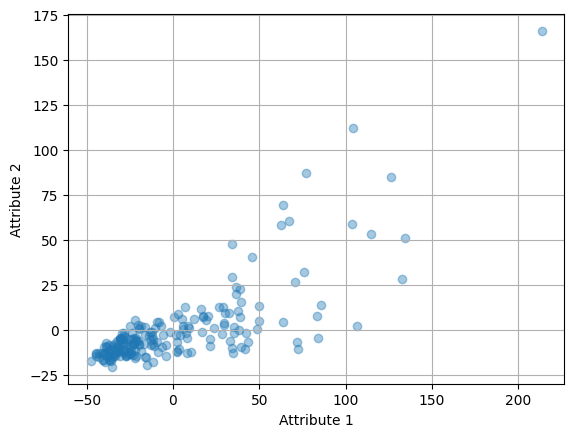

In [6]:
 import matplotlib.pyplot as plt

 plt.scatter(attribute1, attribute2, alpha=0.4)
 plt.xlabel('Attribute 1')
 plt.ylabel('Attribute 2')
 plt.grid(True)
 plt.show

**Plotting Attribute 1's Probability Density Function (PDF). Assuming that attribute 1 is normally distributed**

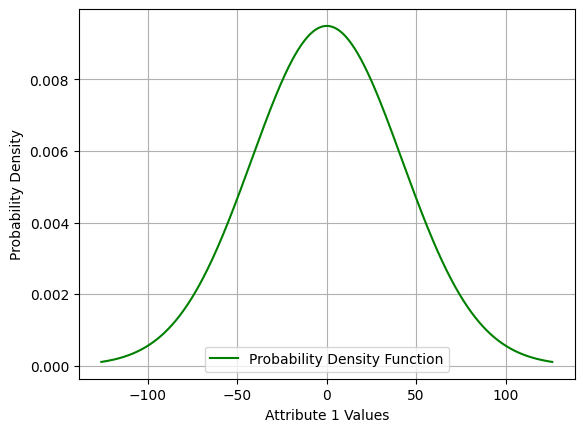

In [11]:
from scipy.stats import norm

meanAttribute1 = attribute1.mean()
standardDeviationAttribute1 = attribute1.std()

x_values = np.linspace(meanAttribute1 - 3 * standardDeviationAttribute1, meanAttribute1 + 3 * standardDeviationAttribute1, 1000)

pdfValues = norm.pdf(x_values, loc=meanAttribute1, scale= standardDeviationAttribute1)

plt.plot(x_values, pdfValues, label = 'Probability Density Function', color = 'green')
plt.xlabel('Attribute 1 Values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

**Plotting Empirical CDFs of Attribute 2, 5, and 7**

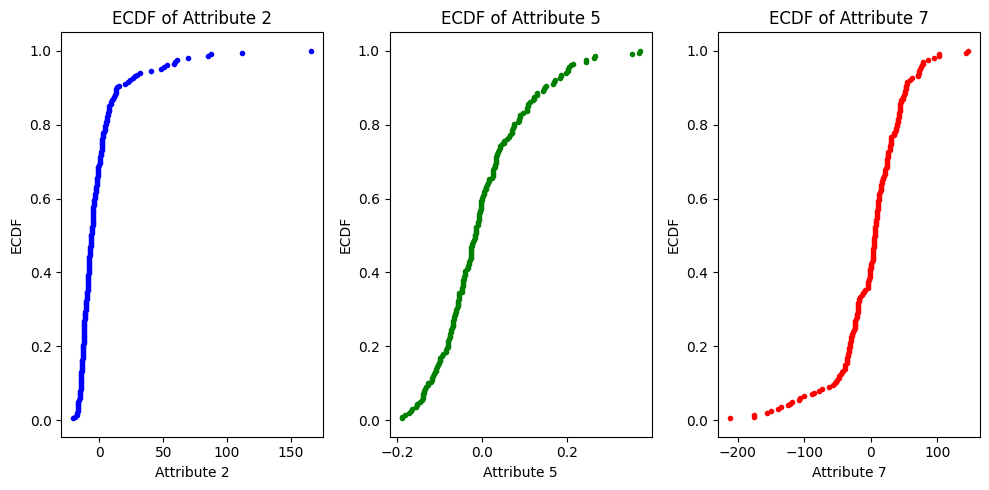

In [12]:
attribute2_data = centeredData['fWidth']
attribute5_data = centeredData['fConc1']
attribute7_data = centeredData['fM3Long']

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_attribute2, y_attribute2 = ecdf(attribute2_data)
x_attribute5, y_attribute5 = ecdf(attribute5_data)
x_attribute7, y_attribute7 = ecdf(attribute7_data)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.plot(x_attribute2, y_attribute2, marker='.', linestyle='none', color='blue')
plt.xlabel('Attribute 2')
plt.ylabel('ECDF')
plt.title('ECDF of Attribute 2')

plt.subplot(132)
plt.plot(x_attribute5, y_attribute5, marker='.', linestyle='none', color='green')
plt.xlabel('Attribute 5')
plt.ylabel('ECDF')
plt.title('ECDF of Attribute 5')

plt.subplot(133)
plt.plot(x_attribute7, y_attribute7, marker='.', linestyle='none', color='red')
plt.xlabel('Attribute 7')
plt.ylabel('ECDF')
plt.title('ECDF of Attribute 7')

plt.tight_layout()
plt.show()


**Finding the attributes that has the largest variance and the smallest variance. Also, printing these values**

In [13]:

variances = centeredData.var()

maxVarianceAttribute = variances.idxmax()
maxVarianceValue = variances.max()

minVarianceAttribute = variances.idxmin()
minVarianceValue = variances.min()

print(f"the largest variance attribute: {maxVarianceAttribute} (Variance = {maxVarianceValue})")
print(f"the smallest variance attribute: {minVarianceAttribute} (Variance = {minVarianceValue})")


the largest variance attribute: fDist (Variance = 6361.467590825798)
the smallest variance attribute: fConc1 (Variance = 0.011461294765671641)


**Finding the pair of attributes that has the largest covariance and the smallest covariance. Also, printing these values**

In [14]:
maxCovarience = covarienceMatrix.values.max()
maxCovariencePair = covarienceMatrix.stack().idxmax()

minCovarience = covarienceMatrix.values.min()
minCovariencePair = covarienceMatrix.stack().idxmin()

print(f"the largest covariance pair: {maxCovariencePair} (Covariance = {maxCovarience})")
print(f"the smallest covariance pair: {minCovariencePair} (Covariance = {minCovarience})")


the largest covariance pair: ('fDist', 'fDist') (Covariance = 6361.467590825793)
the smallest covariance pair: ('fAsym', 'fDist') (Covariance = -659.9735489916216)


**Plotting attribute 6 vs attribute 8. Also marking each point as a circle**

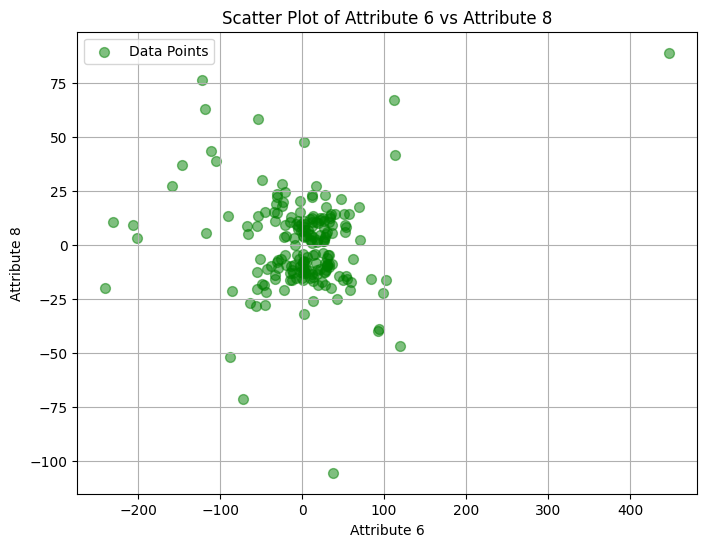

In [15]:
attribute6 = centeredData['fAsym']
attribute8 = centeredData['fM3Trans']

plt.figure(figsize=(8, 6))
plt.scatter(attribute6, attribute8, marker='o', s=50, alpha=0.5, label='Data Points', color='green')
plt.xlabel('Attribute 6')
plt.ylabel('Attribute 8')
plt.title('Scatter Plot of Attribute 6 vs Attribute 8')
plt.legend()
plt.grid(True)
plt.show()
